In [3]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

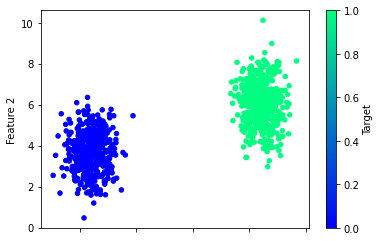

In [4]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [5]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [8]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [9]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [10]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 564us/step - loss: 0.4713 - accuracy: 0.9187
Epoch 2/100
24/24 [==============================] - 0s 477us/step - loss: 0.4617 - accuracy: 0.9227
Epoch 3/100
24/24 [==============================] - 0s 477us/step - loss: 0.4524 - accuracy: 0.9267
Epoch 4/100
24/24 [==============================] - 0s 564us/step - loss: 0.4432 - accuracy: 0.9347
Epoch 5/100
24/24 [==============================] - 0s 520us/step - loss: 0.4343 - accuracy: 0.9373
Epoch 6/100
24/24 [==============================] - 0s 520us/step - loss: 0.4256 - accuracy: 0.9387
Epoch 7/100
24/24 [==============================] - 0s 477us/step - loss: 0.4172 - accuracy: 0.9413
Epoch 8/100
24/24 [==============================] - 0s 477us/step - loss: 0.4090 - accuracy: 0.9413
Epoch 9/100
24/24 [==============================] - 0s 520us/step - loss: 0.4010 - accuracy: 0.9467
Epoch 10/100
24/24 [==============================] - 0s 520us/step - loss: 0.3931 - accura

24/24 [==============================] - 0s 477us/step - loss: 0.0995 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 477us/step - loss: 0.0980 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 520us/step - loss: 0.0965 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 520us/step - loss: 0.0950 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 477us/step - loss: 0.0936 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 477us/step - loss: 0.0922 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 477us/step - loss: 0.0908 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 520us/step - loss: 0.0895 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 520us/step - loss: 0.0882 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 477us/step - loss: 0.0869 - accuracy: 

<AxesSubplot:>

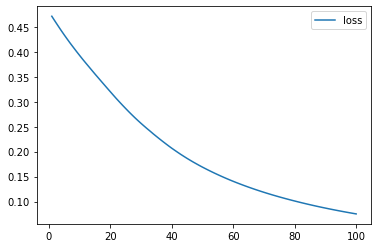

In [13]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

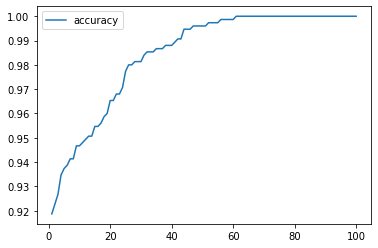

In [14]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0700 - accuracy: 1.0000
Loss: 0.07003376632928848, Accuracy: 1.0


In [16]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

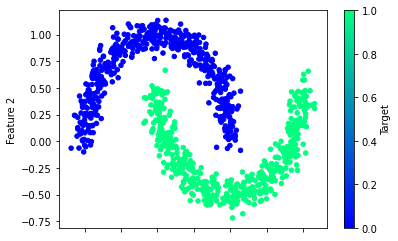

In [17]:
from sklearn.datasets import make_moons
# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)
# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)
# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons
# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [18]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)
# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()
# Fit the scaler
X_moon_scaler.fit(X_moon_train)
# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [19]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 997us/step - loss: 1.1648 - accuracy: 0.4733
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9827 - accuracy: 0.5120
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8678 - accuracy: 0.5373
Epoch 4/100
24/24 [==============================] - 0s 997us/step - loss: 0.7954 - accuracy: 0.5680
Epoch 5/100
24/24 [==============================] - 0s 997us/step - loss: 0.7432 - accuracy: 0.5907
Epoch 6/100
24/24 [==============================] - 0s 997us/step - loss: 0.7031 - accuracy: 0.6027
Epoch 7/100
24/24 [==============================] - 0s 997us/step - loss: 0.6713 - accuracy: 0.6173
Epoch 8/100
24/24 [==============================] - 0s 954us/step - loss: 0.6450 - accuracy: 0.6307
Epoch 9/100
24/24 [==============================] - 0s 997us/step - loss: 0.6217 - accuracy: 0.6467
Epoch 10/100
24/24 [==============================] - 0s 997us/step - loss: 0.6015 - accuracy: 

Epoch 82/100
24/24 [==============================] - 0s 997us/step - loss: 0.2678 - accuracy: 0.8920
Epoch 83/100
24/24 [==============================] - 0s 867us/step - loss: 0.2674 - accuracy: 0.8907
Epoch 84/100
24/24 [==============================] - 0s 887us/step - loss: 0.2670 - accuracy: 0.8907
Epoch 85/100
24/24 [==============================] - 0s 954us/step - loss: 0.2666 - accuracy: 0.8907
Epoch 86/100
24/24 [==============================] - 0s 867us/step - loss: 0.2663 - accuracy: 0.8907
Epoch 87/100
24/24 [==============================] - 0s 867us/step - loss: 0.2659 - accuracy: 0.8907
Epoch 88/100
24/24 [==============================] - 0s 824us/step - loss: 0.2655 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 911us/step - loss: 0.2652 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 954us/step - loss: 0.2649 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 867us/step - loss: 0.2645

<AxesSubplot:>

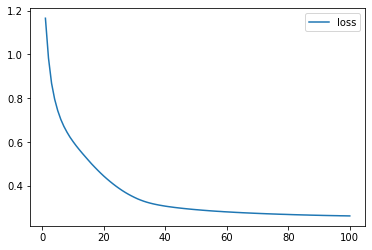

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))
# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

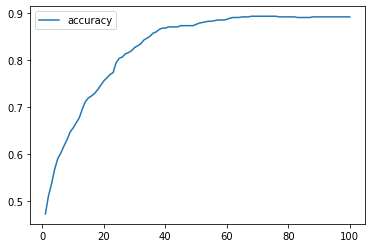

In [21]:
# Plot the loss
history_df.plot(y="accuracy")

In [22]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [23]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 739us/step - loss: 0.8709 - accuracy: 0.3200
Epoch 2/100
24/24 [==============================] - 0s 737us/step - loss: 0.8180 - accuracy: 0.4427
Epoch 3/100
24/24 [==============================] - 0s 650us/step - loss: 0.7714 - accuracy: 0.5107
Epoch 4/100
24/24 [==============================] - 0s 650us/step - loss: 0.7308 - accuracy: 0.5413
Epoch 5/100
24/24 [==============================] - 0s 650us/step - loss: 0.6952 - accuracy: 0.5787
Epoch 6/100
24/24 [==============================] - 0s 650us/step - loss: 0.6629 - accuracy: 0.6187
Epoch 7/100
24/24 [==============================] - 0s 694us/step - loss: 0.6344 - accuracy: 0.6573
Epoch 8/100
24/24 [==============================] - 0s 650us/step - loss: 0.6082 - accuracy: 0.6827
Epoch 9/100
24/24 [==============================] - 0s 564us/step - loss: 0.5843 - accuracy: 0.7040
Epoch 10/100
24/24 [==============================] - 0s 564us/step - loss: 0.5627 - accura

Epoch 81/100
24/24 [==============================] - 0s 607us/step - loss: 0.2504 - accuracy: 0.8893
Epoch 82/100
24/24 [==============================] - 0s 607us/step - loss: 0.2503 - accuracy: 0.8893
Epoch 83/100
24/24 [==============================] - 0s 607us/step - loss: 0.2501 - accuracy: 0.8893
Epoch 84/100
24/24 [==============================] - 0s 564us/step - loss: 0.2500 - accuracy: 0.8893
Epoch 85/100
24/24 [==============================] - 0s 564us/step - loss: 0.2501 - accuracy: 0.8893
Epoch 86/100
24/24 [==============================] - 0s 564us/step - loss: 0.2499 - accuracy: 0.8907
Epoch 87/100
24/24 [==============================] - 0s 564us/step - loss: 0.2497 - accuracy: 0.8893
Epoch 88/100
24/24 [==============================] - 0s 564us/step - loss: 0.2496 - accuracy: 0.8893
Epoch 89/100
24/24 [==============================] - 0s 477us/step - loss: 0.2496 - accuracy: 0.8893
Epoch 90/100
24/24 [==============================] - 0s 477us/step - loss: 0.2495